# Logistic regression

Adapted from [Pytorch tutorial for Deep Learning researchers](https://github.com/yunjey/pytorch-tutorial) (Yunvey Choi, 2018).

Used as part of Deep Learning, Gilles Louppe, 2018.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Hyper-parameters

In [2]:
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Data

In [3]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
data_iter = iter(train_loader)
X, y = data_iter.next()

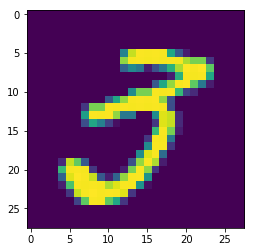

In [5]:
plt.imshow(X[2, 0])

# Model

In [8]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

In [9]:
model(X.view(-1, 28*28))

tensor([[-0.0632, -0.0498,  0.0794,  0.0055, -0.0225, -0.0461,  0.2332, -0.1760,
         -0.2162, -0.1668],
        [-0.0433,  0.0111,  0.0076,  0.0776, -0.0804,  0.0187,  0.1166, -0.3213,
         -0.1408, -0.0492],
        [-0.1218,  0.1563,  0.1808, -0.0773, -0.0679, -0.1908, -0.1435, -0.1074,
         -0.0493,  0.3906],
        [-0.0064,  0.0788,  0.0192, -0.1097,  0.1543, -0.1648, -0.1651, -0.1731,
          0.0897,  0.1604],
        [ 0.0468,  0.3024,  0.1300, -0.2080,  0.1456,  0.1087, -0.0081,  0.2187,
          0.1317,  0.1757],
        [-0.0341,  0.1822,  0.2308, -0.0318,  0.0303, -0.0546, -0.1794, -0.0785,
          0.2415,  0.2383],
        [-0.0764,  0.0414, -0.0463, -0.3282, -0.0428,  0.0028,  0.0865, -0.1913,
         -0.1009,  0.0364],
        [ 0.2203,  0.0893,  0.0305, -0.0840, -0.0126,  0.0689,  0.0640, -0.0959,
         -0.2130,  0.0122],
        [ 0.1717,  0.3325,  0.3922, -0.0238,  0.1317,  0.1874,  0.1751, -0.0215,
          0.1493,  0.0107],
        [ 0.0359, -

# Loss and optimizer

In [10]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Training the Model
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        
        # Forward + Backward + Optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()  # <=> x.grad += dloss/dx for all parameters x
    
    optimizer.step()
    print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
           % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss))

Epoch: [1/5], Step: [600/600], Loss: 2.3230
Epoch: [2/5], Step: [600/600], Loss: 1.7352
Epoch: [3/5], Step: [600/600], Loss: 1.4244
Epoch: [4/5], Step: [600/600], Loss: 1.1426
Epoch: [5/5], Step: [600/600], Loss: 1.0584


# Test the model

In [11]:
# Test the Model
correct = 0
total = 0

for images, labels in test_loader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the model on the 10000 test images: 75 %
